# Preprocessing the Data for a Neural Network


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the charity_data.csv.
rawDF = pd.read_csv("clean_datasets/clean_df2.csv")
rawDF.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name
0,CA,B2,7.39,1.248033e+10,11429.0,Google Ads,10/20/2021,114,1.0,8,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Roseville
1,CA,B1,18.34,1.342492e+10,10922.0,Google Ads,7/26/2021,36,1.0,8,NaN,Local Google PPC_Agency 3_CAP,622.0,1.0,Agency 3,Local,B1 - Redlands
2,WA,B2,3.42,1.150570e+10,11002.0,Google Ads,8/7/2021,165,1.0,2,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Sammamish
3,CA,B2,20.28,1.426434e+10,8810.0,Google Ads,12/19/2021,161,2.0,10,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Irvine
4,TX,B1,5.56,1.290236e+10,11487.0,Google Ads,8/27/2021,56,1.0,3,NaN,Local Google PPC_Agency 2_CAP,622.0,1.0,Agency 2,Local,B1 - Allen


In [2]:
rawDF.info()
# columns to drop from index match: 
# 3,4,5,7,8,9,10,12,13,19,20,21,22,23,24,25,26,27,28,32,34,37,38,39,41,42,43,44,45,46,47,48,49,50,51

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           197268 non-null  object 
 1   brand           197268 non-null  object 
 2   spend           197268 non-null  float64
 3   campaign_id     197268 non-null  float64
 4   mapped_storeid  197268 non-null  float64
 5   platform        197268 non-null  object 
 6   date_start      197268 non-null  object 
 7   impressions     197268 non-null  int64  
 8   leads           197268 non-null  float64
 9   link_clicks     197268 non-null  int64  
 10  reach           194455 non-null  float64
 11  CAP_name        43791 non-null   object 
 12  chainid         43791 non-null   float64
 13  is_cap          43791 non-null   float64
 14  agency          197268 non-null  object 
 15  type            197267 non-null  object 
 16  location_name   197268 non-null  object 
dtypes: float64

In [3]:
# for loop to count understand what values are in "brand" column

# variable to hold the count
cnt = 0
  
# list to hold my B3 values
b3Vals = []
  
# loop for counting the unique
# values in height
for i in range(0, len(rawDF['brand'])):
    
    if rawDF['brand'][i] not in b3Vals: 
    
        b3Vals.append(rawDF['brand'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values name :",
      b3Vals)

No.of.unique values : 3
unique values name : ['B2', 'B1', 'B3']


In [4]:
# First objective; drop all "B3" rows within column "brand"

# observe column brand
rawDF.loc[rawDF['brand']== 'B3']
# output shows B3 starts (index) at 163191 and ends at 197267


,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name
163191,CA,B3,11.76,1.245405e+10,6864.0,Google Ads,11/19/2021,32,0.0,5,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163192,CA,B3,17.63,1.245405e+10,6864.0,Google Ads,12/14/2021,31,1.0,3,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163193,CA,B3,13.68,1.245405e+10,6864.0,Google Ads,4/9/2021,34,1.0,3,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163194,CA,B3,17.54,1.245405e+10,6864.0,Google Ads,10/19/2021,38,1.0,10,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163195,CA,B3,10.64,1.245405e+10,6864.0,Google Ads,10/1/2021,51,1.0,12,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197263,CA,B3,77.28,2.380000e+16,11204.0,Facebook Ads,6/29/2021,1623,0.0,16,1455.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - Del Mar
197264,CA,B3,11.49,2.380000e+16,9376.0,Facebook Ads,6/28/2021,404,0.0,5,398.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose
197265,CA,B3,18.03,2.380000e+16,9376.0,Facebook Ads,6/27/2021,576,0.0,5,559.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose
197266,CA,B3,17.27,2.380000e+16,9376.0,Facebook Ads,6/26/2021,555,0.0,7,537.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose


In [5]:
# Drop all B3 values from brand column:
rawDF['brand'] = rawDF['brand'].drop(labels=range(163191, 197268), axis=0)

In [6]:
# check if any B3 values remain
rawDF.loc[rawDF['brand']== 'B3']

,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name


In [7]:
# filtered out B3, now.. 
# DROP predetermined "problems" columns by index: 
# 4, 11, 12, 15, 13, 3, 16
rawDF.info()
clean_df = rawDF.drop(rawDF.columns[[3,4,11,12,13,15,16]], axis=1)
clean_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           197268 non-null  object 
 1   brand           163191 non-null  object 
 2   spend           197268 non-null  float64
 3   campaign_id     197268 non-null  float64
 4   mapped_storeid  197268 non-null  float64
 5   platform        197268 non-null  object 
 6   date_start      197268 non-null  object 
 7   impressions     197268 non-null  int64  
 8   leads           197268 non-null  float64
 9   link_clicks     197268 non-null  int64  
 10  reach           194455 non-null  float64
 11  CAP_name        43791 non-null   object 
 12  chainid         43791 non-null   float64
 13  is_cap          43791 non-null   float64
 14  agency          197268 non-null  object 
 15  type            197267 non-null  object 
 16  location_name   197268 non-null  object 
dtypes: float64

,state,brand,spend,platform,date_start,impressions,leads,link_clicks,reach,agency
0,CA,B2,7.39,Google Ads,10/20/2021,114,1.0,8,NaN,Agency 2
1,CA,B1,18.34,Google Ads,7/26/2021,36,1.0,8,NaN,Agency 3
2,WA,B2,3.42,Google Ads,8/7/2021,165,1.0,2,NaN,Agency 2
3,CA,B2,20.28,Google Ads,12/19/2021,161,2.0,10,NaN,Agency 2
4,TX,B1,5.56,Google Ads,8/27/2021,56,1.0,3,NaN,Agency 2
...,...,...,...,...,...,...,...,...,...,...
197263,CA,NaN,77.28,Facebook Ads,6/29/2021,1623,0.0,16,1455.0,Agency 3
197264,CA,NaN,11.49,Facebook Ads,6/28/2021,404,0.0,5,398.0,Agency 3
197265,CA,NaN,18.03,Facebook Ads,6/27/2021,576,0.0,5,559.0,Agency 3
197266,CA,NaN,17.27,Facebook Ads,6/26/2021,555,0.0,7,537.0,Agency 3


In [8]:
# check clean df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   state        197268 non-null  object 
 1   brand        163191 non-null  object 
 2   spend        197268 non-null  float64
 3   platform     197268 non-null  object 
 4   date_start   197268 non-null  object 
 5   impressions  197268 non-null  int64  
 6   leads        197268 non-null  float64
 7   link_clicks  197268 non-null  int64  
 8   reach        194455 non-null  float64
 9   agency       197268 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 15.1+ MB


In [9]:
# impression may need binning

# keep and edit location name if done as population size, income, or density
# keep and edit start date if done as binned for seasons

# best columns = spend, state, platform, clicks


# Rough/Quick Preprocessing Complete

# Binning

In [10]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
clean_df.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state            44
brand             2
spend          9464
platform          2
date_start      365
impressions    5870
leads            36
link_clicks     183
reach          5452
agency           11
dtype: int64

In [11]:
# Look at state value counts for binning
stateCnts = clean_df['state'].value_counts()
stateCnts

# add as new column to our df

# It may be appropriate to EITHER: 
# 1. ONLY LOOK AT ONE STATE OF DATA
# OR 2. CREATE BINS BY REGIONS
# or bin by ranges

CA    34208
TX    22380
FL    11681
OH     9765
CO     9524
IL     8673
TN     8096
MO     7571
NC     6283
MI     6187
NJ     6142
VA     5987
GA     5387
PA     5336
AZ     5178
WA     4625
MN     4091
NY     3763
MA     2783
OR     2611
WI     2415
CT     2384
IN     2377
KS     2066
UT     2005
IA     1918
OK     1695
LA     1603
KY     1382
NM     1074
SC      930
MD      913
RI      908
MS      873
NV      751
ME      747
ID      651
NE      433
ND      387
AR      368
VT      331
AL      290
DC      250
SD      246
Name: state, dtype: int64

<AxesSubplot:ylabel='Density'>

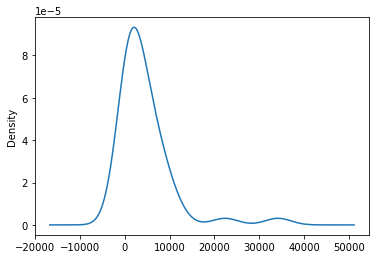

In [12]:
# Visualize the value counts of stateCnts
stateCnts.plot.density()

In [13]:
clean_df.head()
# groupby state
# value counts from state, must match CA to number values
# left join on state

new_df = clean_df[['state', 'impressions']]
df2 = new_df.groupby(by=['state']).count()
df2

,impressions
state,
AL,290
AR,368
AZ,5178
CA,34208
CO,9524
CT,2384
DC,250
FL,11681
GA,5387


In [14]:
# merge 
merge_df = pd.merge(clean_df, df2, on=['state'])
merge_df

,state,brand,spend,platform,date_start,impressions_x,leads,link_clicks,reach,agency,impressions_y
0,CA,B2,7.39,Google Ads,10/20/2021,114,1.0,8,NaN,Agency 2,34208
1,CA,B1,18.34,Google Ads,7/26/2021,36,1.0,8,NaN,Agency 3,34208
2,CA,B2,20.28,Google Ads,12/19/2021,161,2.0,10,NaN,Agency 2,34208
3,CA,B1,19.53,Google Ads,7/9/2021,22,1.0,6,NaN,Agency 3,34208
4,CA,B2,48.47,Google Ads,8/28/2021,325,2.0,24,NaN,Agency 2,34208
...,...,...,...,...,...,...,...,...,...,...,...
197263,SD,NaN,26.24,Facebook Ads,8/20/2021,1624,2.0,36,1519.0,Agency 3,246
197264,SD,NaN,14.72,Facebook Ads,8/19/2021,974,2.0,29,934.0,Agency 3,246
197265,SD,NaN,36.69,Facebook Ads,8/19/2021,2453,7.0,75,2159.0,Agency 3,246
197266,SD,NaN,53.53,Facebook Ads,8/18/2021,3144,6.0,83,2824.0,Agency 3,246


In [15]:
# Determine which values to replace if counts are less than ...?

# Tier 1: 10000+
# Tier 2: 5000-10000
# Tier 3: 1000-5000
# Tier 4: <1000

# pd.cut documentation here
# not qcut b/c its equal dist.


bins = [0, 1000, 5000, 10000, 40000]
labels =['T1', 'T2', 'T3', 'T4']


merge_df['State Tiers'] = pd.cut(merge_df['impressions_y'], bins,labels=labels)
print (merge_df)


       state brand  spend      platform  date_start  impressions_x  leads  \
0         CA    B2   7.39    Google Ads  10/20/2021            114    1.0   
1         CA    B1  18.34    Google Ads   7/26/2021             36    1.0   
2         CA    B2  20.28    Google Ads  12/19/2021            161    2.0   
3         CA    B1  19.53    Google Ads    7/9/2021             22    1.0   
4         CA    B2  48.47    Google Ads   8/28/2021            325    2.0   
...      ...   ...    ...           ...         ...            ...    ...   
197263    SD   NaN  26.24  Facebook Ads   8/20/2021           1624    2.0   
197264    SD   NaN  14.72  Facebook Ads   8/19/2021            974    2.0   
197265    SD   NaN  36.69  Facebook Ads   8/19/2021           2453    7.0   
197266    SD   NaN  53.53  Facebook Ads   8/18/2021           3144    6.0   
197267    SD   NaN  53.59  Facebook Ads   8/17/2021           2968   14.0   

        link_clicks   reach    agency  impressions_y State Tiers  
0       

In [16]:
# showing t4 as a filter
merge_df[merge_df['State Tiers'] == 'T4']

,state,brand,spend,platform,date_start,impressions_x,leads,link_clicks,reach,agency,impressions_y,State Tiers
0,CA,B2,7.39,Google Ads,10/20/2021,114,1.0,8,NaN,Agency 2,34208,T4
1,CA,B1,18.34,Google Ads,7/26/2021,36,1.0,8,NaN,Agency 3,34208,T4
2,CA,B2,20.28,Google Ads,12/19/2021,161,2.0,10,NaN,Agency 2,34208,T4
3,CA,B1,19.53,Google Ads,7/9/2021,22,1.0,6,NaN,Agency 3,34208,T4
4,CA,B2,48.47,Google Ads,8/28/2021,325,2.0,24,NaN,Agency 2,34208,T4
...,...,...,...,...,...,...,...,...,...,...,...,...
78876,FL,NaN,52.45,Facebook Ads,8/17/2021,2685,3.0,30,2514.0,Agency 3,11681,T4
78877,FL,NaN,52.09,Facebook Ads,8/16/2021,2662,3.0,23,2511.0,Agency 3,11681,T4
78878,FL,NaN,44.56,Facebook Ads,8/15/2021,2389,3.0,28,2239.0,Agency 3,11681,T4
78879,FL,NaN,41.74,Facebook Ads,8/14/2021,2529,9.0,35,2342.0,Agency 3,11681,T4


In [17]:
# drop impressions y
merge_df.drop('impressions_y', axis=1, inplace=True)
merge_df.head()

,state,brand,spend,platform,date_start,impressions_x,leads,link_clicks,reach,agency,State Tiers
0,CA,B2,7.39,Google Ads,10/20/2021,114,1.0,8,NaN,Agency 2,T4
1,CA,B1,18.34,Google Ads,7/26/2021,36,1.0,8,NaN,Agency 3,T4
2,CA,B2,20.28,Google Ads,12/19/2021,161,2.0,10,NaN,Agency 2,T4
3,CA,B1,19.53,Google Ads,7/9/2021,22,1.0,6,NaN,Agency 3,T4
4,CA,B2,48.47,Google Ads,8/28/2021,325,2.0,24,NaN,Agency 2,T4


In [18]:
merge_df.tail()

,state,brand,spend,platform,date_start,impressions_x,leads,link_clicks,reach,agency,State Tiers
197263,SD,NaN,26.24,Facebook Ads,8/20/2021,1624,2.0,36,1519.0,Agency 3,T1
197264,SD,NaN,14.72,Facebook Ads,8/19/2021,974,2.0,29,934.0,Agency 3,T1
197265,SD,NaN,36.69,Facebook Ads,8/19/2021,2453,7.0,75,2159.0,Agency 3,T1
197266,SD,NaN,53.53,Facebook Ads,8/18/2021,3144,6.0,83,2824.0,Agency 3,T1
197267,SD,NaN,53.59,Facebook Ads,8/17/2021,2968,14.0,53,2705.0,Agency 3,T1


In [19]:
clean_df = merge_df.rename(columns={'impressions_x': 'Impressions'})
clean_df

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers
0,CA,B2,7.39,Google Ads,10/20/2021,114,1.0,8,NaN,Agency 2,T4
1,CA,B1,18.34,Google Ads,7/26/2021,36,1.0,8,NaN,Agency 3,T4
2,CA,B2,20.28,Google Ads,12/19/2021,161,2.0,10,NaN,Agency 2,T4
3,CA,B1,19.53,Google Ads,7/9/2021,22,1.0,6,NaN,Agency 3,T4
4,CA,B2,48.47,Google Ads,8/28/2021,325,2.0,24,NaN,Agency 2,T4
...,...,...,...,...,...,...,...,...,...,...,...
197263,SD,NaN,26.24,Facebook Ads,8/20/2021,1624,2.0,36,1519.0,Agency 3,T1
197264,SD,NaN,14.72,Facebook Ads,8/19/2021,974,2.0,29,934.0,Agency 3,T1
197265,SD,NaN,36.69,Facebook Ads,8/19/2021,2453,7.0,75,2159.0,Agency 3,T1
197266,SD,NaN,53.53,Facebook Ads,8/18/2021,3144,6.0,83,2824.0,Agency 3,T1


In [20]:
# edit reach column 
df = clean_df[clean_df['reach'].notna()]

In [21]:
# check if reach values that are null dropped
df['reach'].isna().value_counts()

False    194455
Name: reach, dtype: int64

In [22]:
# check new df
df.tail()

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers
197263,SD,NaN,26.24,Facebook Ads,8/20/2021,1624,2.0,36,1519.0,Agency 3,T1
197264,SD,NaN,14.72,Facebook Ads,8/19/2021,974,2.0,29,934.0,Agency 3,T1
197265,SD,NaN,36.69,Facebook Ads,8/19/2021,2453,7.0,75,2159.0,Agency 3,T1
197266,SD,NaN,53.53,Facebook Ads,8/18/2021,3144,6.0,83,2824.0,Agency 3,T1
197267,SD,NaN,53.59,Facebook Ads,8/17/2021,2968,14.0,53,2705.0,Agency 3,T1


In [23]:
### REPLACE ADS AS 1 and 2
### NEED TA HELP

# change ads to 1 or 2 designation
#df_updated = df['platform'] = df['platform'].astype(int)
#df_updated = df['platform'].replace(['Facebook Ads', 'Google Ads'], ['1', '2'])

In [24]:
# check if we have nan values throughout the df
df.isnull().sum().sum()

33970

In [25]:
# drop all missing values
edited_df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [26]:
# check if missing values dropped
edited_df.isnull().sum().sum()

0

In [27]:
# check on our df
edited_df.sample(20)

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers
7965,CA,B1,9.53,Facebook Ads,5/19/2021,836,1.0,3,764.0,Agency 4,T4
5539,CA,B1,28.37,Facebook Ads,1/15/2021,3048,2.0,9,2903.0,Agency 4,T4
62204,VA,B2,4.94,Facebook Ads,7/9/2021,208,1.0,2,203.0,Agency 4,T3
69965,FL,B1,19.63,Facebook Ads,7/18/2021,1988,0.0,64,1812.0,Agency 6,T4
96088,AZ,B2,13.09,Facebook Ads,2/27/2021,456,0.0,2,448.0,Agency 3,T3
61724,VA,B2,32.02,Facebook Ads,11/18/2021,1020,1.0,8,922.0,Agency 2,T3
121025,OR,B1,0.00,Facebook Ads,6/21/2021,0,0.0,0,0.0,Agency 3,T2
181286,IA,B2,45.25,Facebook Ads,3/5/2021,2334,2.0,9,2205.0,Agency 3,T2
42852,TX,B1,0.00,Facebook Ads,6/11/2021,0,0.0,0,0.0,Agency 6,T4
18119,CA,B1,15.82,Facebook Ads,2/16/2021,1190,0.0,0,1120.0,Agency 4,T4


In [28]:
# gut check on state column
# new dropped shows CA dropped from 34k to 25k datapoints!
edited_df['state'].value_counts()

CA    25248
TX    17883
FL     9526
OH     8923
IL     8038
TN     7097
CO     7093
MO     6794
PA     5208
NC     5183
NJ     5164
AZ     5121
MI     4532
GA     3756
WA     3559
MN     3463
VA     2639
OR     2575
WI     2415
IN     2348
MA     2329
NY     2277
KS     2066
UT     1953
IA     1918
LA     1603
CT     1491
KY     1382
OK     1205
NM     1074
RI      908
MS      873
ME      747
NV      686
ID      651
SC      565
MD      556
ND      387
AR      368
VT      331
AL      290
NE      260
Name: state, dtype: int64

In [29]:
# Look at agency value counts for binning
agencyCnts = edited_df['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 3     62464
Agency 4     43728
Agency 2     32301
Agency 6     10952
Agency 7      4090
Agency 5      3831
Agency 9      1645
Agency 8       912
Agency 10      557
Agency 11        5
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

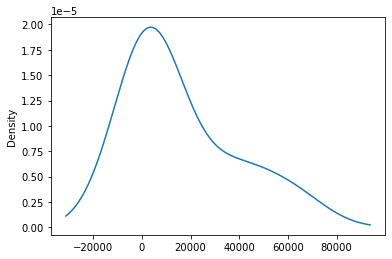

In [30]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [31]:
# groupby/left join agency
# value counts from agency

dfnew = edited_df[['agency', 'Impressions']]
dfT = dfnew.groupby(by=['agency']).count()
dfT

,Impressions
agency,
Agency 10,557
Agency 11,5
Agency 2,32301
Agency 3,62464
Agency 4,43728
Agency 5,3831
Agency 6,10952
Agency 7,4090
Agency 8,912


In [32]:
# merge 
# use concat? 
### ISSUE: other columns not showing up
merge_df2 = pd.merge(edited_df, dfT, on=['agency'])
merge_df2

,state,brand,spend,platform,date_start,Impressions_x,leads,link_clicks,reach,agency,State Tiers,Impressions_y
0,CA,B1,5.83,Facebook Ads,5/11/2021,500,0.0,0,476.0,Agency 4,T4,43728
1,CA,B1,16.22,Facebook Ads,2/16/2021,1324,1.0,3,1236.0,Agency 4,T4,43728
2,CA,B1,7.33,Facebook Ads,5/14/2021,380,0.0,2,354.0,Agency 4,T4,43728
3,CA,B1,44.20,Facebook Ads,7/17/2021,2090,1.0,7,1987.0,Agency 4,T4,43728
4,CA,B1,10.86,Facebook Ads,5/27/2021,387,0.0,3,359.0,Agency 4,T4,43728
...,...,...,...,...,...,...,...,...,...,...,...,...
160480,ME,B1,2.01,Facebook Ads,12/29/2021,43,0.0,2,30.0,Agency 11,T1,5
160481,ME,B1,1.38,Facebook Ads,12/30/2021,31,0.0,0,24.0,Agency 11,T1,5
160482,ME,B1,11.27,Facebook Ads,12/30/2021,673,1.0,4,567.0,Agency 11,T1,5
160483,ME,B1,11.34,Facebook Ads,12/31/2021,800,0.0,2,691.0,Agency 11,T1,5


In [33]:
# Determine which values to replace if counts are less than ...?

# Tier 1: 60000+
# Tier 2: 10000-30000
# Tier 3: 1000-10000
# Tier 4: <1000

# pd.cut documentation here
# not qcut b/c its equal dist.


bins = [0, 1000, 10000, 30000, 70000]
labels =['T1', 'T2', 'T3', 'T4']


merge_df2['Agency Tiers'] = pd.cut(merge_df2['Impressions_y'], bins,labels=labels)
print (merge_df2)


       state brand  spend      platform  date_start  Impressions_x  leads  \
0         CA    B1   5.83  Facebook Ads   5/11/2021            500    0.0   
1         CA    B1  16.22  Facebook Ads   2/16/2021           1324    1.0   
2         CA    B1   7.33  Facebook Ads   5/14/2021            380    0.0   
3         CA    B1  44.20  Facebook Ads   7/17/2021           2090    1.0   
4         CA    B1  10.86  Facebook Ads   5/27/2021            387    0.0   
...      ...   ...    ...           ...         ...            ...    ...   
160480    ME    B1   2.01  Facebook Ads  12/29/2021             43    0.0   
160481    ME    B1   1.38  Facebook Ads  12/30/2021             31    0.0   
160482    ME    B1  11.27  Facebook Ads  12/30/2021            673    1.0   
160483    ME    B1  11.34  Facebook Ads  12/31/2021            800    0.0   
160484    ME    B1   9.27  Facebook Ads  12/29/2021            465    1.0   

        link_clicks   reach     agency State Tiers  Impressions_y Agency Ti

In [34]:
# drop impressions y
merge_df2.drop('Impressions_y', axis=1, inplace=True)
merge_df2.head()

,state,brand,spend,platform,date_start,Impressions_x,leads,link_clicks,reach,agency,State Tiers,Agency Tiers
0,CA,B1,5.83,Facebook Ads,5/11/2021,500,0.0,0,476.0,Agency 4,T4,T4
1,CA,B1,16.22,Facebook Ads,2/16/2021,1324,1.0,3,1236.0,Agency 4,T4,T4
2,CA,B1,7.33,Facebook Ads,5/14/2021,380,0.0,2,354.0,Agency 4,T4,T4
3,CA,B1,44.20,Facebook Ads,7/17/2021,2090,1.0,7,1987.0,Agency 4,T4,T4
4,CA,B1,10.86,Facebook Ads,5/27/2021,387,0.0,3,359.0,Agency 4,T4,T4


In [44]:
df3 = merge_df2.rename(columns={'Impressions_x': 'Impressions'})
df3

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers,Agency Tiers
0,CA,B1,5.83,Facebook Ads,5/11/2021,500,0.0,0,476.0,Agency 4,T4,T4
1,CA,B1,16.22,Facebook Ads,2/16/2021,1324,1.0,3,1236.0,Agency 4,T4,T4
2,CA,B1,7.33,Facebook Ads,5/14/2021,380,0.0,2,354.0,Agency 4,T4,T4
3,CA,B1,44.20,Facebook Ads,7/17/2021,2090,1.0,7,1987.0,Agency 4,T4,T4
4,CA,B1,10.86,Facebook Ads,5/27/2021,387,0.0,3,359.0,Agency 4,T4,T4
...,...,...,...,...,...,...,...,...,...,...,...,...
160480,ME,B1,2.01,Facebook Ads,12/29/2021,43,0.0,2,30.0,Agency 11,T1,T1
160481,ME,B1,1.38,Facebook Ads,12/30/2021,31,0.0,0,24.0,Agency 11,T1,T1
160482,ME,B1,11.27,Facebook Ads,12/30/2021,673,1.0,4,567.0,Agency 11,T1,T1
160483,ME,B1,11.34,Facebook Ads,12/31/2021,800,0.0,2,691.0,Agency 11,T1,T1


In [46]:
df3.sample(10)

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers,Agency Tiers
15265,NC,B1,0.00,Facebook Ads,12/18/2021,0,0.0,0,0.0,Agency 4,T3,T4
144267,FL,B2,48.39,Facebook Ads,10/31/2021,2084,4.0,23,1798.0,Agency 5,T4,T2
3472,CA,B1,15.67,Facebook Ads,7/31/2021,1256,0.0,1,1234.0,Agency 4,T4,T4
41222,LA,B1,8.10,Facebook Ads,8/7/2021,586,1.0,4,556.0,Agency 4,T2,T4
74021,IN,B2,98.59,Facebook Ads,12/6/2021,2996,3.0,14,2762.0,Agency 2,T2,T4
126950,MO,B2,14.72,Facebook Ads,10/7/2021,852,0.0,4,820.0,Agency 3,T3,T4
118307,OR,B1,81.56,Facebook Ads,3/17/2021,4239,7.0,14,4052.0,Agency 3,T2,T4
29335,GA,B1,15.45,Facebook Ads,3/29/2021,662,1.0,1,634.0,Agency 4,T3,T4
91932,WA,B1,1.96,Facebook Ads,9/26/2021,555,0.0,1,510.0,Agency 3,T2,T4
6539,TX,B1,9.01,Facebook Ads,5/6/2021,1072,0.0,2,1027.0,Agency 4,T4,T4


In [50]:
# transform leads column from # of leads to binary, yes or no on a lead success 
# check non nulls
df3['leads'].notnull().astype('int')

0         1
1         1
2         1
3         1
4         1
         ..
160480    1
160481    1
160482    1
160483    1
160484    1
Name: leads, Length: 160485, dtype: int32

In [51]:
df3['leads'].isnull().astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
160480    0
160481    0
160482    0
160483    0
160484    0
Name: leads, Length: 160485, dtype: int32

In [56]:
# change nulls == 0
df.leads.fillna(0,inplace=True)

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
# change non nulls == 1 
df3["leads"]=df["leads"].apply(lambda x: 1 if x!=0 else 0)

In [59]:
df3['leads'].sample(10)

55201     0.0
99498     1.0
92907     1.0
125389    1.0
55118     0.0
28161     0.0
98978     1.0
157939    0.0
74847     0.0
39330     0.0
Name: leads, dtype: float64

In [60]:
df3.sample(10)

,state,brand,spend,platform,date_start,Impressions,leads,link_clicks,reach,agency,State Tiers,Agency Tiers
87246,CA,B2,8.01,Facebook Ads,12/22/2021,355,1.0,4,344.0,Agency 3,T4,T4
67234,IL,B2,31.93,Facebook Ads,2/5/2021,1710,NaN,24,1604.0,Agency 2,T3,T4
92251,WA,B1,45.04,Facebook Ads,11/26/2021,1980,0.0,25,1824.0,Agency 3,T2,T4
112759,AZ,B1,35.22,Facebook Ads,9/18/2021,2203,0.0,14,2080.0,Agency 3,T3,T4
30480,MO,B1,0.00,Facebook Ads,6/24/2021,0,1.0,0,0.0,Agency 4,T3,T4
125763,MO,B2,40.82,Facebook Ads,4/7/2021,2291,1.0,21,2142.0,Agency 3,T3,T4
53520,CA,B1,32.47,Facebook Ads,2/19/2021,1250,1.0,9,1183.0,Agency 2,T4,T4
30811,MO,B1,10.13,Facebook Ads,8/9/2021,694,1.0,0,653.0,Agency 4,T3,T4
35622,MI,B1,10.58,Facebook Ads,5/3/2021,656,0.0,2,613.0,Agency 4,T3,T4
46562,IN,B1,72.22,Facebook Ads,12/21/2021,2720,0.0,17,2131.0,Agency 7,T2,T2


In [61]:
# use scorecard advanced binning
# https://pypi.org/project/scorecardpy/
import scorecardpy as sc

In [62]:
bins = sc.woebin(df3, y="leads")

[INFO] creating woe binning ...


C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:96: UserWarning: There are NaNs in 'leads' column. The rows with NaN in 'leads' were removed from dat.
  warnings.warn("There are NaNs in \'{}\' column. The rows with NaN in \'{}\' were removed from dat.".format(y,y))
C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: platform)
  warnings.warn("There are {} columns h

{'spend': <Figure size 432x288 with 2 Axes>,
 'brand': <Figure size 432x288 with 2 Axes>,
 'reach': <Figure size 432x288 with 2 Axes>,
 'Impressions': <Figure size 432x288 with 2 Axes>,
 'link_clicks': <Figure size 432x288 with 2 Axes>,
 'agency': <Figure size 432x288 with 2 Axes>,
 'state': <Figure size 432x288 with 2 Axes>,
 'Agency Tiers': <Figure size 432x288 with 2 Axes>,
 'State Tiers': <Figure size 432x288 with 2 Axes>}

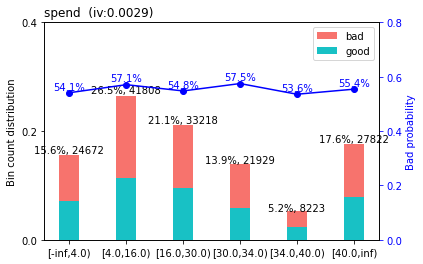

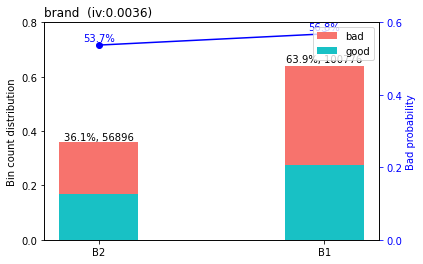

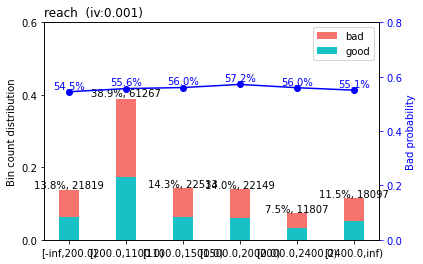

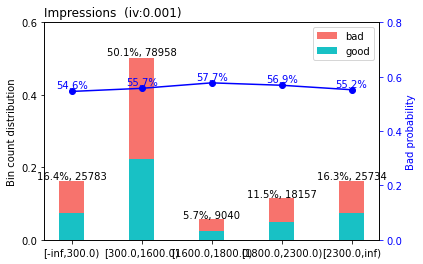

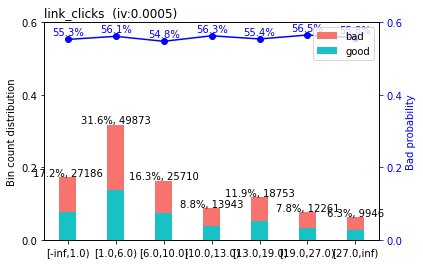

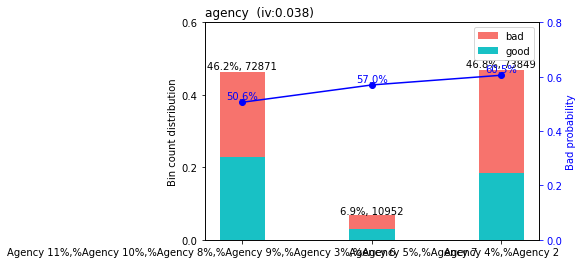

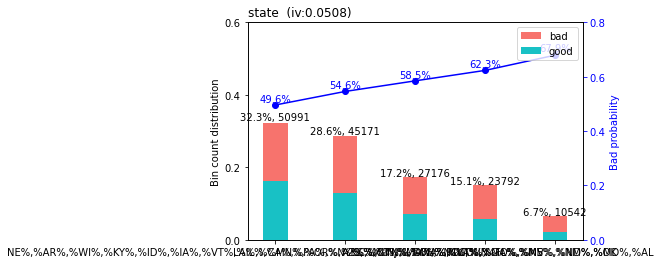

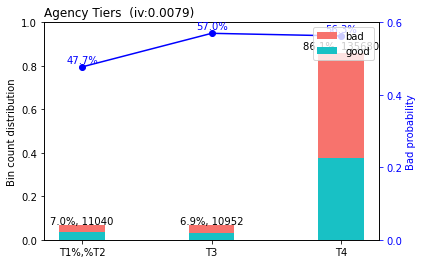

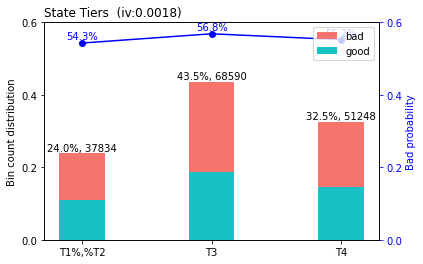

In [63]:
# plot the bins
sc.woebin_plot(bins)

In [ ]:
# generagte cat variables
# Generate our categorical variable lists
application_cat = df3.dtypes[df3.dtypes == "object"].index.tolist()

In [ ]:
# one hot encoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# create new df before merging later
encoded_df = pd.DataFrame(enc.fit_transform(df3[application_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

In [ ]:
# merge dfs
df4 = df3.merge(encoded_df, left_index=True, right_index=True)
df4 = df3.drop(application_cat, 1)
df4.head()

# Split into train and test features

In [ ]:
# Split our preprocessed data into our features and target arrays
y = df4['leads'].values
X = df4.drop(['leads'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train, Evaluate our Model

In [ ]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# # using multi-layer perceptron (two layers)
# numInputFeatures = len(X_train[0])

# # I have 19k columns
# # layer1 = input layer, typically equals number of input variables in data
# layer1 = 20
# # layer 2 = hidden layer, typically 2/3 of input layer
# layer2 = 10
# # layer 3 = hidden layer
# layer3= 5

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(
#     tf.keras.layers.Dense(units=layer1, 
#                           input_dim=numInputFeatures, 
#                           activation="relu")
# )
# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=layer2, 
#                              activation="relu"))

# # adding a third layer to increase accuracy 
# nn.add(tf.keras.layers.Dense(units=layer3, 
#                              activation='relu'))


# # Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn.summary()

In [ ]:
# # Compile the model
# nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every epoch
# cp_callback = ModelCheckpoint(
#     # checkpoint directory and file structure defined above
#     filepath=checkpoint_path,
#     # notified when checkpoint is being saved to the directory
#     verbose=1,
#     # checkpoint files take small space
#     save_weights_only=True,
#     # checkpoints saved every epoch
#     save_freq='epoch')

In [ ]:
# # Train the model
# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Export the model to HDF5 file
# nn.save("AlphabetSoupCharity_optimization.h5")